In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv('Data/merged_movies_data.csv')

In [74]:
# Duration 중에 h와 m이 존재하지 않는 row 확인
# Duration 에 MPA 데이터가 들어있는 row 확인 -> MPA로 변경필요 및 기존 Druation은 NaN으로 변경
for i in df[df['Duration'].str.contains('h|m') == False].index:
    df.loc[i, 'MPA'] = df.loc[i, 'Duration']
    df.loc[i, 'Duration'] = np.nan

In [75]:
# 데이터 전처리 (공통) - 정제 - 결측치 처리
# duration = "2h 30m" , " 30m", "2h"
def str_to_minutes(duration):
    if pd.isnull(duration):
        return duration
    if 'h' in duration:
        duration = duration.split('h')
        hours = int(duration[0])
        if 'm' in duration[1]:
            minutes = int(duration[1].split('m')[0])
        else:
            minutes = 0
        return hours*60 + minutes
    elif 'm' in duration:
        return int(duration.split('m')[0])
    else:
        return duration

df['MPA'] = df['MPA'].fillna("Not Rated")
df['Duration'].unique()
df['Duration'] = df['Duration'].apply(str_to_minutes)
df['Duration'] = df['Duration'].fillna(df['Duration'].mean())

In [76]:
df['Rating'] = df['Rating'].fillna(5.5)
# 1K = 1000 and 1M = 1000000 and 1.4K = 1400
def str_to_number(votes):
    if pd.isnull(votes):
        return votes
    if 'K' in votes:
        return float(votes[:-1])*1000
    elif 'M' in votes:
        return float(votes[:-1])*1000000
    else:
        return float(votes)
df['Votes'] = df['Votes'].apply(str_to_number)
df['Votes'] = df['Votes'].fillna(0)

In [77]:
# 수익 관련 데이터 결측치 처리
df['grossWorldWide'] = df['grossWorldWide'].fillna(0)
df['gross_US_Canada'] = df['gross_US_Canada'].fillna(0)
df['opening_weekend_Gross'] = df['opening_weekend_Gross'].fillna(0)

In [78]:
# 불필요 컬럼 삭제
df = df.drop('Movie Link', axis=1)
df = df.drop('release_date', axis=1)
df

,Title,Year,Duration,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,opening_weekend_Gross,...,writers,stars,genres,countries_origin,filming_locations,production_companies,Languages,wins,nominations,oscars
0,1. Star Wars: Episode III - Revenge of the Sith,2005,140.0,PG-13,7.6,867000.0,113000000.0,850035635.0,380270577.0,108435841.0,...,['George Lucas'],"['Hayden Christensen', 'Natalie Portman', 'Ewa...","['Action Epic', 'Adventure Epic', 'Dark Fantas...","['United States', 'Italy', 'Switzerland', 'Tha...","['Mount Etna, Catania, Sicily, Italy']","['Lucasfilm', 'Mestiere Cinema', 'Pandora Films']",['English'],0,64,1
1,"2. The Chronicles of Narnia: The Lion, the Wit...",2005,143.0,PG,6.9,438000.0,180000000.0,745013115.0,291710957.0,65556312.0,...,"['Ann Peacock', 'Andrew Adamson', 'Christopher...","['Tilda Swinton', 'Georgie Henley', 'William M...","['Fantasy Epic', 'Supernatural Fantasy', 'Swor...","['United Kingdom', 'United States']","['Adrspach National Park, Trutnov, Czech Repub...","['Walt Disney Pictures', 'Walden Media']","['English', 'German', 'Brazilian Sign Language']",0,46,0
2,3. Harry Potter and the Goblet of Fire,2005,157.0,PG-13,7.7,705000.0,150000000.0,897468952.0,290469928.0,102685961.0,...,"['Steve Kloves', 'J.K. Rowling']","['Daniel Radcliffe', 'Emma Watson', 'Rupert Gr...","['Sword & Sorcery', 'Teen Adventure', 'Teen Fa...","['United Kingdom', 'United States']","['Glenfinnan Viaduct, Fort William, Highland, ...","['Warner Bros.', 'Heyday Films', 'Patalex Prod...","['English', 'French', 'Latin']",0,48,1
3,4. War of the Worlds,2005,117.0,PG-13,6.5,485000.0,132000000.0,603873504.0,234280354.0,64878725.0,...,"['Josh Friedman', 'David Koepp', 'H.G. Wells']","['Tom Cruise', 'Dakota Fanning', 'Tim Robbins']","['Action Epic', 'Adventure Epic', 'Alien Invas...",['United States'],"['JF Kennedy Blvd., Bayonne, New Jersey, USA']","['Paramount Pictures', 'Dreamworks Pictures', ...",['English'],0,49,3
4,5. King Kong,2005,187.0,PG-13,7.2,455000.0,207000000.0,556906378.0,218080025.0,50130145.0,...,"['Fran Walsh', 'Philippa Boyens', 'Peter Jacks...","['Naomi Watts', 'Jack Black', 'Adrien Brody']","['Adventure Epic', 'Dark Romance', 'Dinosaur A...","['United States', 'New Zealand', 'Germany']","['Shelly Bay, Wellington, New Zealand']","['Universal Pictures', 'WingNut Films', 'Big P...",['English'],0,104,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10695,596. Vettaiyan,2024,163.0,Not Rated,7.1,38000.0,NaN,2397623.0,0.0,0.0,...,['T.J. Gnanavel'],"['Fahadh Faasil', 'Amitabh Bachchan', 'Rajinik...","['Cop Drama', 'One-Person Army Action', 'Actio...",['India'],[],['Lyca Productions'],['Tamil'],0,0,0
10696,597. Nr. 24,2024,111.0,Not Rated,7.7,3400.0,NaN,3301976.0,0.0,0.0,...,"['Erlend Loe', 'Espen Lauritzen von Ibenfeldt']","['Mark Noble', 'Lisa Loven Kongsli', 'August W...","['Docudrama', 'Epic', 'Period Drama', 'Biograp...",['Norway'],"['Rjukan, Tinn, Norway']","['SF Norge A/S', 'Motion Blur Films']",['Norwegian'],0,0,0
10697,598. Parallel,2024,88.0,Not Rated,5.3,1700.0,NaN,0.0,0.0,0.0,...,"['Aldis Hodge', 'Edwin Hodge', 'Jonathan Keasey']","['Danielle Deadwyler', 'Aldis Hodge', 'Edwin H...","['Drama', 'Sci-Fi', 'Thriller']",['United States'],[],"['Rumble Riot Pictures', 'Hodge Brothers Produ...",[],0,0,0
10698,599. Fight or Flight,2024,166.0,Not Rated,7.0,117.0,NaN,0.0,0.0,0.0,...,"['Brooks McLaren', 'D.J. Cotrona']","['Josh Hartnett', 'Katee Sackhoff', 'Charithra...","['Action', 'Comedy']","['United States', 'United Kingdom']",['Hungary'],"['Asbury Park Productions', 'The Royal Budapes...",['English'],0,0,0


In [79]:
# df[df['budget'].isnull()]['genres'].value_counts()
# # 장르가 없는 데이터의 budget 확인
# # df[df['genres'] == '[]']['budget'].value_counts()
# df[df.budget.isnull()].genres.value_counts()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10700 entries, 0 to 10699
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  10700 non-null  object 
 1   Year                   10700 non-null  int64  
 2   Duration               10700 non-null  float64
 3   MPA                    10700 non-null  object 
 4   Rating                 10700 non-null  float64
 5   Votes                  10700 non-null  float64
 6   budget                 4749 non-null   float64
 7   grossWorldWide         10700 non-null  float64
 8   gross_US_Canada        10700 non-null  float64
 9   opening_weekend_Gross  10700 non-null  float64
 10  directors              10700 non-null  object 
 11  writers                10700 non-null  object 
 12  stars                  10700 non-null  object 
 13  genres                 10700 non-null  object 
 14  countries_origin       10700 non-null  object 
 15  fi

,Year,Duration,Rating,Votes,budget,grossWorldWide,gross_US_Canada,opening_weekend_Gross,wins,nominations,oscars
count,10700.000000,10700.000000,10700.000000,1.070000e+04,4.749000e+03,1.070000e+04,1.070000e+04,1.070000e+04,10700.0,10700.000000,10700.000000
mean,2014.654766,106.090278,6.368804,5.426478e+04,1.688698e+08,4.286324e+07,1.636946e+07,4.950719e+06,0.0,10.948598,0.099252
std,5.828472,20.382064,1.059514,1.370121e+05,4.490761e+09,1.413102e+08,5.318728e+07,1.677251e+07,0.0,28.736221,0.500172
min,2005.000000,44.000000,1.100000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000
25%,2009.000000,92.000000,5.800000,1.400000e+03,4.000000e+06,7.006450e+04,2.664550e+04,4.458250e+03,0.0,0.000000,0.000000
50%,2015.000000,102.000000,6.500000,7.900000e+03,1.500000e+07,1.200102e+06,2.042350e+05,2.940000e+04,0.0,0.000000,0.000000
75%,2020.000000,116.000000,7.100000,4.200000e+04,4.300000e+07,1.830332e+07,4.197936e+06,6.802742e+05,0.0,10.000000,0.000000
max,2024.000000,325.000000,9.600000,3.000000e+06,3.000000e+11,2.923706e+09,9.366622e+08,3.571150e+08,0.0,433.000000,10.000000


In [80]:
display(df[df.budget.isnull()])

,Title,Year,Duration,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,opening_weekend_Gross,...,writers,stars,genres,countries_origin,filming_locations,production_companies,Languages,wins,nominations,oscars
75,76. Beauty Shop,2005,105.0,PG-13,5.6,19000.0,NaN,37245453.0,36351350.0,12801465.0,...,"['Elizabeth Hunter', 'Kate Lanier', 'Norman Va...","['Queen Latifah', 'Alicia Silverstone', 'Djimo...",['Comedy'],['United States'],"['Atlanta, Georgia, USA']","['Metro-Goldwyn-Mayer (MGM)', 'State Street Pi...",['English'],0,0,0
78,79. The Ringer,2005,94.0,PG-13,5.8,39000.0,NaN,40442443.0,35428675.0,5158795.0,...,['Ricky Blitt'],"['Johnny Knoxville', 'Katherine Heigl', 'Brian...","['Comedy', 'Sport']",['United States'],"['San Marcos, Texas, USA']","['Conundrum Entertainment', 'Major Studio Part...",['English'],0,0,0
81,82. In Her Shoes,2005,130.0,PG-13,6.5,66000.0,NaN,83697473.0,32880591.0,10017575.0,...,"['Jennifer Weiner', 'Susannah Grant']","['Toni Collette', 'Cameron Diaz', 'Shirley Mac...","['Feel-Good Romance', 'Romantic Comedy', 'Come...","['United Kingdom', 'Germany', 'United States']","['Philadelphia, Pennsylvania, USA']","['Fox 2000 Pictures', 'Scott Free Productions'...",['English'],0,7,0
85,86. Just Friends,2005,96.0,PG-13,6.2,131000.0,NaN,51024243.0,32619671.0,9275000.0,...,"[""Adam 'Tex' Davis""]","['Ryan Reynolds', 'Amy Smart', 'Anna Faris']","['Feel-Good Romance', 'Holiday Comedy', 'Holid...","['Germany', 'United States', 'Canada']","['Regina, Saskatchewan, Canada']","['Inferno Distribution', 'Cinerenta Medienbete...",['English'],0,0,0
106,107. Ice Princess,2005,98.0,G,6.0,29000.0,NaN,27645491.0,24402491.0,6807471.0,...,"['Meg Cabot', 'Hadley Davis']","['Michelle Trachtenberg', 'Kim Cattrall', 'Tre...","['Teen Comedy', 'Comedy', 'Drama', 'Family', '...","['Canada', 'United States']","['Toronto, Ontario, Canada']","['Walt Disney Pictures', 'Bridget Johnson Film...",['English'],0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10695,596. Vettaiyan,2024,163.0,Not Rated,7.1,38000.0,NaN,2397623.0,0.0,0.0,...,['T.J. Gnanavel'],"['Fahadh Faasil', 'Amitabh Bachchan', 'Rajinik...","['Cop Drama', 'One-Person Army Action', 'Actio...",['India'],[],['Lyca Productions'],['Tamil'],0,0,0
10696,597. Nr. 24,2024,111.0,Not Rated,7.7,3400.0,NaN,3301976.0,0.0,0.0,...,"['Erlend Loe', 'Espen Lauritzen von Ibenfeldt']","['Mark Noble', 'Lisa Loven Kongsli', 'August W...","['Docudrama', 'Epic', 'Period Drama', 'Biograp...",['Norway'],"['Rjukan, Tinn, Norway']","['SF Norge A/S', 'Motion Blur Films']",['Norwegian'],0,0,0
10697,598. Parallel,2024,88.0,Not Rated,5.3,1700.0,NaN,0.0,0.0,0.0,...,"['Aldis Hodge', 'Edwin Hodge', 'Jonathan Keasey']","['Danielle Deadwyler', 'Aldis Hodge', 'Edwin H...","['Drama', 'Sci-Fi', 'Thriller']",['United States'],[],"['Rumble Riot Pictures', 'Hodge Brothers Produ...",[],0,0,0
10698,599. Fight or Flight,2024,166.0,Not Rated,7.0,117.0,NaN,0.0,0.0,0.0,...,"['Brooks McLaren', 'D.J. Cotrona']","['Josh Hartnett', 'Katee Sackhoff', 'Charithra...","['Action', 'Comedy']","['United States', 'United Kingdom']",['Hungary'],"['Asbury Park Productions', 'The Royal Budapes...",['English'],0,0,0


In [ ]:
# 장르별 예산이 없는 데이터의 경우 동일한 장르의 평균 예산으로 대체
df['budget'] = df['budget'].fillna(df.groupby('genres')['budget'].transform('mean'))
display(df[df.budget.isnull()])
df.budget.isnull().sum()

,Title,Year,Duration,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,opening_weekend_Gross,...,writers,stars,genres,countries_origin,filming_locations,production_companies,Languages,wins,nominations,oscars
106,107. Ice Princess,2005,98.0,G,6.0,29000.0,NaN,27645491.0,24402491.0,6807471.0,...,"['Meg Cabot', 'Hadley Davis']","['Michelle Trachtenberg', 'Kim Cattrall', 'Tre...","['Teen Comedy', 'Comedy', 'Drama', 'Family', '...","['Canada', 'United States']","['Toronto, Ontario, Canada']","['Walt Disney Pictures', 'Bridget Johnson Film...",['English'],0,0,0
143,144. Casanova,2005,112.0,R,6.5,57000.0,NaN,37691644.0,11304403.0,119276.0,...,"['Jeffrey Hatcher', 'Kimberly Simi', 'Michael ...","['Heath Ledger', 'Sienna Miller', 'Jeremy Irons']","['Period Drama', 'Adventure', 'Comedy', 'Drama...",['United States'],['Palazzo Soranzo Van Axel - 6099 Sestiere Can...,"['Touchstone Pictures', 'The Mark Gordon Compa...",['English'],0,3,0
147,148. In the Mix,2005,95.0,PG-13,3.0,8700.0,NaN,10223896.0,10223896.0,4448491.0,...,"['Jacqueline Zambrano', 'Chanel Capra', 'Cara ...","['Usher', 'Chazz Palminteri', 'Emmanuelle Chri...","['Comedy', 'Crime', 'Drama', 'Music', 'Romance']",['United States'],"['Hollywood, Los Angeles, California, USA']","['J & C Entertainment', 'Lionsgate', 'Releve E...",['English'],0,0,0
160,161. The Aristocrats,2005,89.0,Not Rated,6.4,17000.0,NaN,6809788.0,6377461.0,243796.0,...,[],"['George Carlin', 'Don Rickles', 'Chris Rock']","['Satire', 'Stand-Up', 'Comedy', 'Documentary']",['United States'],[],['Mighty Cheese Productions'],['English'],0,0,0
194,195. State Property: Blood on the Streets,2005,94.0,R,4.5,1600.0,NaN,1691706.0,1691706.0,756905.0,...,"['Blue Moreno', 'Damon Dash']","['Beanie Sigel', 'N.O.R.E.', 'Damon Dash']","['Action', 'Crime', 'Drama', 'Musical']",['United States'],"['Philadelphia, Pennsylvania, USA']","['Dash Films', 'Lionsgate']",['English'],0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,579. William Tell,2024,133.0,R,7.1,109.0,NaN,0.0,0.0,0.0,...,['Nick Hamm'],"['Jonathan Pryce', 'Claes Bang', 'Golshifteh F...","['Action', 'Biography', 'Drama', 'History', 'W...","['United Kingdom', 'Switzerland', 'Italy']",['Switzerland'],"['Free Turn', 'Tempo Productions', 'Beta Cinema']",['English'],0,0,0
10685,586. The Greatest Hits,2024,94.0,PG-13,6.2,6800.0,NaN,0.0,0.0,0.0,...,['Ned Benson'],"['Lucy Boynton', 'Justin H. Min', 'David Coren...","['Drama', 'Music', 'Romance', 'Sci-Fi']",['United States'],"['Los Angeles, California, USA']","['Far Hills Pictures', 'Groundswell Production...",['English'],0,0,0
10692,593. My Spy The Eternal City,2024,112.0,PG-13,5.7,10000.0,NaN,0.0,0.0,0.0,...,"['Erich Hoeber', 'Jon Hoeber', 'Peter Segal']","['Dave Bautista', 'Chloe Coleman', 'Kristen Sc...","['Buddy Comedy', 'Spy', 'Action', 'Comedy']",['United States'],"['Cape Town, South Africa']","['Amazon MGM Studios', 'STX Films', 'Madison W...",['English'],0,0,0
10696,597. Nr. 24,2024,111.0,Not Rated,7.7,3400.0,NaN,3301976.0,0.0,0.0,...,"['Erlend Loe', 'Espen Lauritzen von Ibenfeldt']","['Mark Noble', 'Lisa Loven Kongsli', 'August W...","['Docudrama', 'Epic', 'Period Drama', 'Biograp...",['Norway'],"['Rjukan, Tinn, Norway']","['SF Norge A/S', 'Motion Blur Films']",['Norwegian'],0,0,0


np.int64(1918)

In [9]:
# from sklearn.preprocessing import OneHotEncoder

# # df['genres'] => ['Drama', 'Sci-Fi']
# # One-Hot Encoding
# encoder = OneHotEncoder()
# genres = df['genres'].str.strip('[]').str.replace('\'', '').str.split(', ', expand=True)
# genres = genres.fillna('Unknown')
# genres = encoder.fit_transform(genres).toarray()
# genres = pd.DataFrame(genres, columns=encoder.categories_)
# df = pd.concat([df, genres], axis=1)
# df
# from sklearn.preprocessing import MultiLabelBinarizer
# # 문자열 데이터를 리스트로 변환
# df['genres'] = df['genres'].str.strip('[]').str.replace('\'', '').str.split(', ')

# # MultiLabelBinarizer를 사용한 One-Hot Encoding
# mlb = MultiLabelBinarizer()
# genres_encoded = pd.DataFrame(mlb.fit_transform(df['genres']), columns=mlb.classes_, index=df.index)

# # 원본 데이터와 결합
# df = pd.concat([df, genres_encoded], axis=1)

# # 결과 출력
# df

df['budget'] = df['budget'].fillna(0)

In [10]:
# 1. **저예산 vs 고예산 영화의 수익률 비교**
#     - 저예산 영화의 성공 사례를 파악하기 위한 박스 플롯
df['budget'].describe()

count    1.070000e+04
mean     7.494978e+07
std      2.992778e+09
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.200000e+07
max      3.000000e+11
Name: budget, dtype: float64

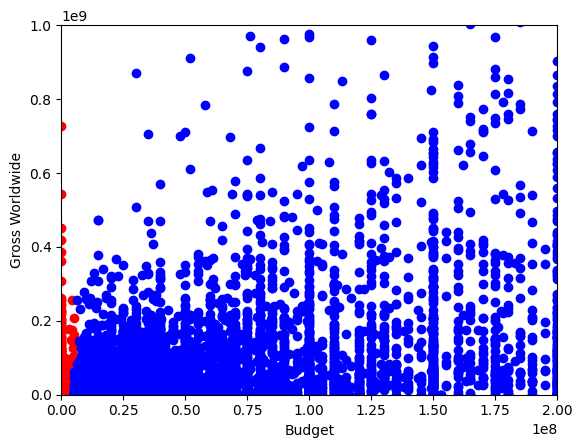

{'whiskers': [<matplotlib.lines.Line2D at 0x12224daf0>,
 'caps': [<matplotlib.lines.Line2D at 0x1262233b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1261f0290>,
 'medians': [<matplotlib.lines.Line2D at 0x1261f0ec0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1261f1190>,
 'means': []}

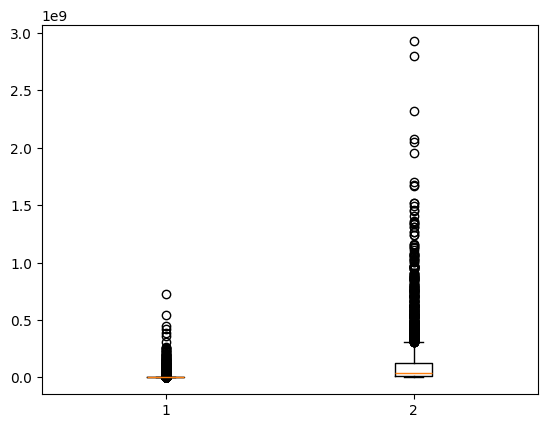

In [11]:

# 저예산 영황의 기준은 500만 달러
low_budget = df[df['budget'] <= 5000000]
high_budget = df[df['budget'] > 5000000]
plt.scatter(low_budget['budget'], low_budget['grossWorldWide'], color='red', label='Low Budget')
plt.scatter(low_budget['budget'], low_budget['gross_US_Canada'], color='red', label='Low Budget')
plt.scatter(low_budget['budget'], low_budget['opening_weekend_Gross'], color='red', label='Low Budget')
# plt.xlim(0, 5e6)
plt.ylim(0, 1e9)
plt.xlabel('Budget')
plt.ylabel('Gross Worldwide')
# plt.show()
plt.scatter(high_budget['budget'], high_budget['grossWorldWide'], color='blue', label='High Budget')
plt.scatter(high_budget['budget'], high_budget['gross_US_Canada'], color='blue', label='High Budget')
plt.scatter(high_budget['budget'], high_budget['opening_weekend_Gross'], color='blue', label='High Budget')
plt.xlim(0, 2e8)
plt.show()

plt.boxplot([low_budget['grossWorldWide'], high_budget['grossWorldWide']])

# plt.bar(['Low Budget', 'High Budget'], [low_budget['grossWorldWide'].mean(), high_budget['grossWorldWide'].mean()])

In [12]:
# !pip install geopandas
import seaborn as sns
import geopandas as gpd

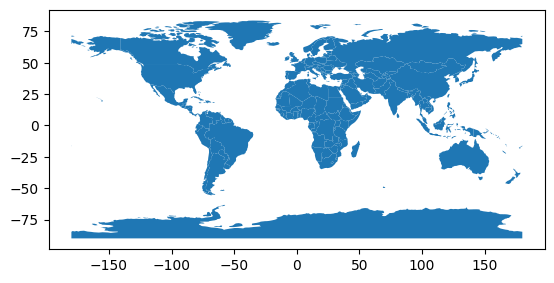

countries_origin                                                                                                                                  grossWorldWide
['Algeria', 'France', 'Morocco', 'Belgium']                                                                                                       22963701.0        1
['Argentina', 'Brazil', 'France', 'Netherlands', 'Germany', 'Belgium', 'Switzerland']                                                             557092.0          1
['Argentina', 'Brazil', 'Spain', 'Dominican Republic', 'France', 'Netherlands', 'Mexico', 'Switzerland', 'United States', 'Portugal', 'Lebanon']  489692.0          1
['Argentina', 'Chile', 'France', 'South Korea', 'Spain']                                                                                          4120012.0         1
['Argentina', 'Chile']                                                                                                                            205350.0          1
         

In [13]:
# df.columns
# Index(['Title', 'Year', 'Duration', 'MPA', 'Rating', 'Votes', 'budget',
#        'grossWorldWide', 'gross_US_Canada', 'opening_weekend_Gross',
#        'directors', 'writers', 'stars', 'genres', 'countries_origin',
#        'filming_locations', 'production_companies', 'Languages', 'wins',
#        'nominations', 'oscars'],
#       dtype='object')
world = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp',encoding = 'ANSI')
world.plot()
plt.show()
# 2. **국가별 제작 영화의 글로벌 수익 비교**
#     - 국가별 평균 흥행 수익을 지도 시각화
df.groupby('countries_origin')['grossWorldWide'].value_counts()

In [14]:
# 3. **IMDb 평점 상위 영화와 수상 여부**
#     - 수상 여부와 평점 간의 관계를 히스토그램으로 나타냄
df['oscars'].value_counts()
df['wins'].value_counts()
df['nominations'].value_counts()
df['Rating'].value_counts()


Rating
7.1    483
6.7    468
6.6    464
6.5    461
6.4    446
      ... 
1.5      2
1.1      1
1.3      1
1.8      1
1.2      1
Name: count, Length: 85, dtype: int64

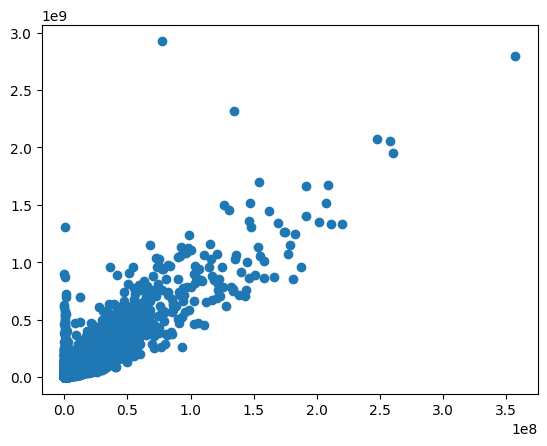

In [15]:
# 4. **개봉 첫 주 수익과 최종 글로벌 수익 관계**
#     - 개봉 첫 주 수익이 전체 흥행에 미치는 영향을 산점도로 표현
plt.scatter(df['opening_weekend_Gross'], df['grossWorldWide'])

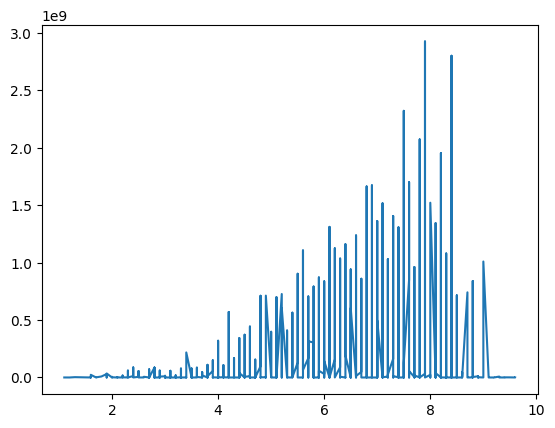

In [36]:
# 5. **장르별 평균 수익과 IMDb 평점의 관계**
#     - 각 장르의 흥행 성과와 관객 평가를 혼합 막대/꺾은선 그래프로 표현
df_rating_gww = df.sort_values(by='Rating' ,ascending=False)
plt.plot(df_rating_gww['Rating'], df_rating_gww['grossWorldWide'])

<Axes: xlabel='Year'>

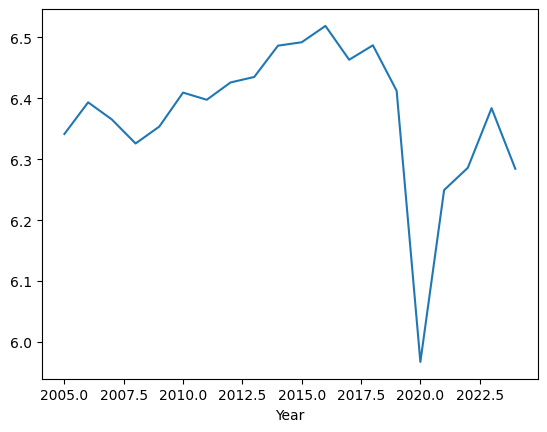

In [44]:
# 연도별 평균 평점
df_year_rate = df.groupby('Year')['Rating'].mean()
df_year_rate.plot()

<Axes: xlabel='Year'>

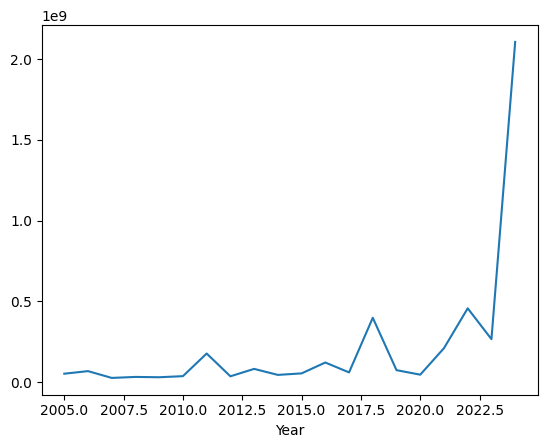

In [57]:
# 연도별 평균 예산
df_year_rate = df.groupby('Year')['budget'].mean()
df_year_rate.plot()

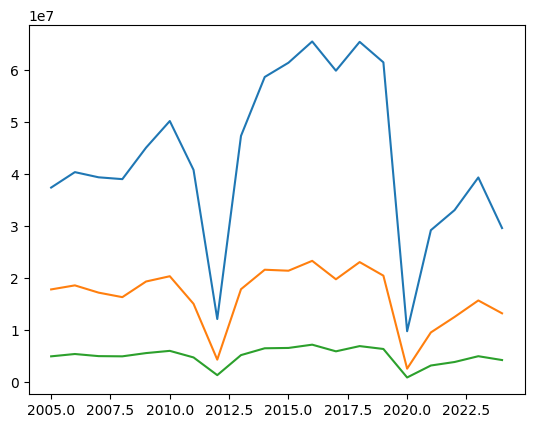

In [60]:
# 연도별 평균 수익
df_year_gww = df.groupby('Year')['grossWorldWide'].mean()
df_year_usc = df.groupby('Year')['gross_US_Canada'].mean()
df_year_owg = df.groupby('Year')['opening_weekend_Gross'].mean()
plt.plot(df_year_gww)
plt.plot(df_year_usc)
plt.plot(df_year_owg)
plt.show()
